In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [150]:
def fract(a):
    return a - np.floor(a)

def random(a):
    return fract(np.sin(a)*10000.0)

def random2D(vec2D):
    return fract(np.sin(np.dot(vec2D, np.array([12.9898, 78.233]))) * 43758.5453123)

def mix(a, b, f):
    return a*(1-f) + b*f

def clamp(x, a, b):
    if a <= x <= b:
        res = x
    elif x < a:
        res = a
    elif x > b:
        res = b
    return res

In [4]:
x = np.arange(0, 10, 0.01)

In [5]:
y = random(x)

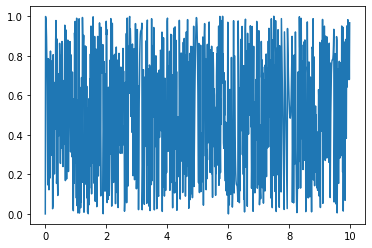

In [6]:
plt.plot(x,y)

In [7]:
y

array([0.00000000e+00, 9.98333342e-01, 9.86666933e-01, 9.55002025e-01,
       8.93341866e-01, 7.91692707e-01, 6.40064794e-01, 4.28473375e-01,
       1.46939692e-01, 7.85491980e-01, 3.34166468e-01, 7.83008372e-01,
       1.22072889e-01, 3.41426197e-01, 4.31146442e-01, 3.81324736e-01,
       1.82066142e-01, 8.23490670e-01, 2.95734258e-01, 5.88949765e-01,
       6.93307951e-01, 5.98998461e-01, 2.96230809e-01, 7.75235352e-01,
       2.62642713e-02, 3.95925452e-02, 8.05518922e-01, 3.14366888e-01,
       5.56485641e-01, 5.22251048e-01, 2.02066613e-01, 5.86364434e-01,
       6.65606161e-01, 4.30283949e-01, 8.70921408e-01, 9.78074555e-01,
       7.42332751e-01, 1.54319650e-01, 2.04694130e-01, 8.84151232e-01,
       1.83423087e-01, 9.32798442e-02, 6.04530596e-01, 7.08024292e-01,
       3.94650660e-01, 6.55341112e-01, 4.81069655e-01, 8.62853791e-01,
       7.91755415e-01, 2.58881712e-01, 2.55386042e-01, 7.72468829e-01,
       8.01378437e-01, 3.33412048e-01, 3.59916531e-01, 8.72289307e-01,
      

In [109]:
def generateImage(resolution, f_process, offset_x = 0, offset_y = 0):
    image = np.empty([resolution, resolution])
    for y in range(0, resolution):
        for x in range(0, resolution):
            point = np.array([x/resolution, y/resolution])
            point[0] = point[0] + offset_y
            point[1] = point[1] + offset_x
            color = f_process(point)
            image[x,y] = color
    return image

In [110]:
def identity(point):
    return 1

In [134]:
def gridRandom(point):
    resolution = 100.0
    p = point
    #p = point/resolution
    
    p = p*70
    ipos = np.floor(p)
    fpos = fract(p)
    
    color = random2D(ipos)
    
    return color

In [140]:
offset_x = 0.0
offset_y = 0.0
image = generateImage(1000, gridRandom, offset_x, offset_y)

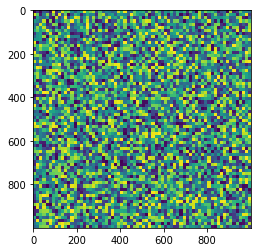

In [141]:
plt.imshow(image)

In [142]:
image

array([[0.        , 0.        , 0.        , ..., 0.38041297, 0.38041297,
        0.38041297],
       [0.        , 0.        , 0.        , ..., 0.38041297, 0.38041297,
        0.38041297],
       [0.        , 0.        , 0.        , ..., 0.38041297, 0.38041297,
        0.38041297],
       ...,
       [0.32816744, 0.32816744, 0.32816744, ..., 0.19945825, 0.19945825,
        0.19945825],
       [0.32816744, 0.32816744, 0.32816744, ..., 0.19945825, 0.19945825,
        0.19945825],
       [0.32816744, 0.32816744, 0.32816744, ..., 0.19945825, 0.19945825,
        0.19945825]])

In [143]:
image_clipped = np.maximum(image, 0.996)

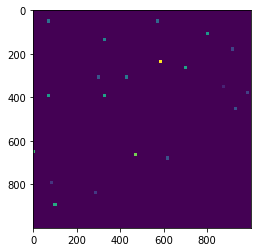

In [139]:
plt.imshow(image_clipped)

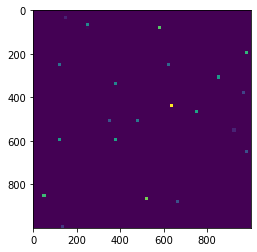

In [144]:
plt.imshow(image_clipped)

In [149]:
a = np.array([0,0])
b = np.array([10, 20])
mix(a,b,0.5)

array([ 5., 10.])

In [156]:
clamp(2, 3, 7)

3

In [707]:
def cloud(point):
    p = point * 10
    
    i = np.floor(p)
    f = fract(p)
    
    a = random2D(i)
    b = random2D(i + np.array([1.0, 0.0]))
    c = random2D(i + np.array([0.0, 1.0]))
    d = random2D(i + np.array([1.0, 1.0]))
    
    u = f*f*(3.0 - 2.0 * f)
    
    return mix(a, b, u[0]) + (c - a) * u[1] * (1.0 - u[0]) + (d - b) * u[0] * u[1]

In [708]:
image = generateImage(100, cloud)

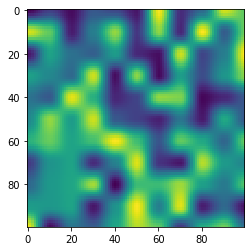

In [709]:
plt.imshow(image)

In [710]:
image_clipped = np.maximum(image, 0.5)

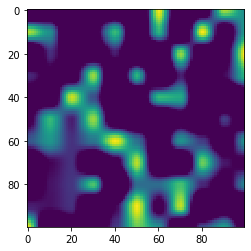

In [711]:
plt.imshow(image_clipped)

In [712]:
def fbm(point):
    
    point = point * 1
    H = 0.3
    t = 0.0
    nbOctaves = 3
    
    for i in range(nbOctaves):
        f = 2**i
        a = f**(-H)
        t += a * cloud(f * point)
    #print(t)
    return t

In [713]:
image = generateImage(100, fbm)

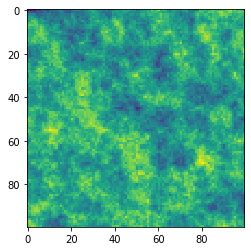

In [714]:
plt.imshow(image)

In [715]:
def pattern(point):
    point = point * 0.001
    
    q = np.array([fbm(point), fbm(point + np.array([5.2, 1.3]))])
    r = np.array([fbm(point + 4*q + np.array([1.7, 9.2])), fbm(point + 4*q + np.array([9.3, 2.8]))])
    return fbm(point + 4*r)

In [716]:
image = generateImage(100, pattern)

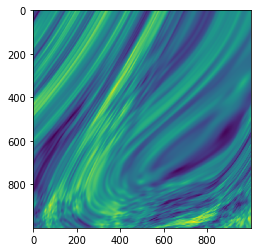

In [706]:
plt.imshow(image)

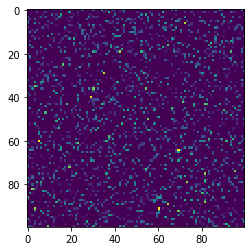

In [720]:
image_clipped = np.maximum(image, 2)
plt.imshow(image_clipped)

In [721]:
def double_fbm(point):
    p = point * 1
    
    return pattern(p + pattern(p + pattern(p)))

In [718]:
image = generateImage(100, double_fbm)

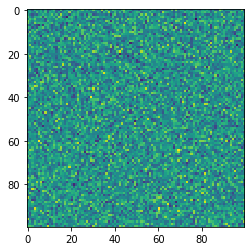

In [719]:
plt.imshow(image)

In [694]:
plt.imsave("image.png", image)